In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install wordcloud

In [2]:
df=pd.read_csv("C:/stress.csv")
df

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.800000,1521614353,5,1.806818,...,1.0000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.000000,1527009817,4,9.429737,...,1.1250,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.800000,1535935605,2,7.769821,...,1.0000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.600000,1516429555,0,2.667798,...,1.0000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.800000,1539809005,24,7.554238,...,1.0000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1713,0,1.000000,1515187044,13,-1.369333,...,1.4000,1.0000,1.0,1.71133,1.45301,2.00304,0.84,16,0.254444,0.552066
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133,1,1.000000,1539827412,33,9.425478,...,1.0000,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6,8.640664,-0.220370
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442,0,1.000000,1539269312,2,11.060675,...,1.1250,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1,9.951524,0.045455
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834,0,0.571429,1488938143,4,2.421912,...,1.1111,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7,4.036765,0.159722


In [3]:
df.isnull()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2834,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2835,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2836,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [5]:
import nltk
import re
from nltk. corpus import stopwords
import string 
nltk.download('stopwords')
stemmer = nltk. SnowballStemmer("english")
stopword=set (stopwords . words ( 'english' ))

def clean(text):
    text = str(text) . lower() #returns a string where all characters are lower case . symbols and numbers are ignored 
    text = re. sub('\[.*?\]',' ',text)#substring and retruns a string with replaced values 
    text = re. sub('https?://\S+/www\. \S+', ' ',text) #whitespace character with pattern
    text = re. sub('<. *?>+', ' ', text)#special char enclosed in square bracekts
    text = re. sub(' [%s]' % re. escape(string.punctuation), ' ',text)#eliminate punctuation from string
    text = re. sub(' \n',' ', text)
    text = re. sub(' \w*\d\w*' ,' ', text)#word character ASCII punctuation
    text = [word for word in text.split(' ')if word not in stopword] #removing stopwords
    text = " ". join(text)
    text = [stemmer . stem(word) for word in text. split(' ') ]#remove morphological affixes from words
    text = " ".join(text)
    return text
df [ "text"] = df["text"]. apply(clean)

c:\Users\ACER\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
c:\Users\ACER\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org

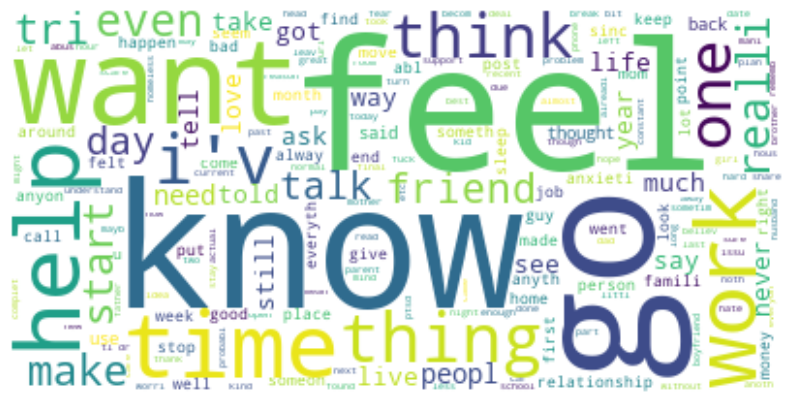

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text= " ". join(i for i in df. text)
stopwords = set (STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white") . generate(text)
plt. figure(figsize=(10, 10) )
plt. imshow(wordcloud, interpolation='bilinear')
plt. axis("off")
plt. show( )


In [7]:
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. model_selection import train_test_split

x = np.array (df["text"])
y = np.array (df["label"])

cv = CountVectorizer ()
X = cv. fit_transform(x)
print(X)
xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size=0.33,random_state=42)


  (0, 7405)	1
  (0, 3278)	1
  (0, 9454)	1
  (0, 861)	1
  (0, 8359)	1
  (0, 3750)	1
  (0, 7214)	1
  (0, 8908)	1
  (0, 298)	1
  (0, 9749)	1
  (0, 4303)	1
  (0, 5034)	1
  (0, 5325)	1
  (0, 2188)	1
  (0, 5118)	1
  (0, 3265)	1
  (0, 2593)	3
  (0, 4188)	1
  (0, 5316)	1
  (0, 3697)	1
  (0, 8339)	1
  (0, 6861)	1
  (0, 4150)	1
  (0, 5174)	1
  (0, 1831)	1
  :	:
  (2836, 877)	1
  (2836, 4555)	1
  (2836, 2928)	1
  (2836, 4615)	1
  (2836, 4785)	1
  (2836, 4511)	1
  (2837, 7405)	2
  (2837, 3018)	1
  (2837, 5533)	2
  (2837, 8784)	1
  (2837, 8502)	1
  (2837, 6770)	1
  (2837, 4318)	1
  (2837, 9670)	1
  (2837, 5569)	1
  (2837, 8881)	1
  (2837, 5713)	1
  (2837, 2587)	1
  (2837, 7468)	1
  (2837, 2351)	1
  (2837, 7804)	1
  (2837, 2758)	1
  (2837, 8880)	1
  (2837, 5459)	1
  (2837, 3020)	1


In [14]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(xtrain,ytrain)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [15]:
user=input("Enter the text: ")
data=cv.transform([user]).toarray()
output=model.predict(data)
if(output==1):
    print('stressed')
else:
    print('not stressed')

[0]
not stressed
